# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
print df_raw.count()
print len(df_raw)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
400


Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

/Users/s.delesque/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Higher numbers (220 to 800), so in absolute terms the gap between values is higher.

#### Question 4. Drop data points with missing data


In [12]:
df_clean = df_raw.dropna()
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 3 rows less

#### Question 6. Create box plots for GRE and GPA

/Users/s.delesque/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11ad77e10>],
 'caps': [<matplotlib.lines.Line2D at 0x11ae5ed50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ae69f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ad01650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11ae5e050>,
  <matplotlib.lines.Line2D at 0x11ae5e710>]}

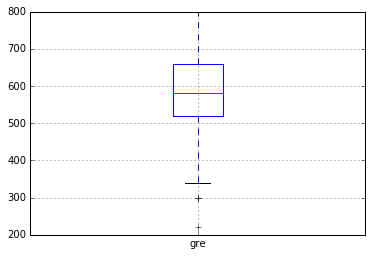

In [15]:
df_clean.boxplot(column='gre')

/Users/s.delesque/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11b0e18d0>],
 'caps': [<matplotlib.lines.Line2D at 0x11b0f1810>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b0fdb10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11b0fd4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11b0e1ad0>,
  <matplotlib.lines.Line2D at 0x11b0f11d0>]}

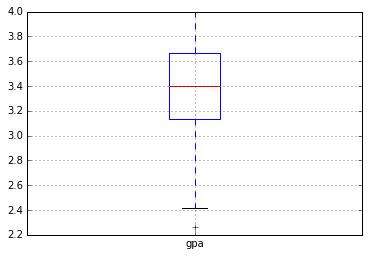

In [16]:
df_clean.boxplot(column='gpa')

#### Question 7. What do this plots show?

Answer: The min of the gpa ranking seems further off the median than for the gre. The data seems pretty normally distributes overall, but slightly skewed towards the higher values.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5c0e10>]], dtype=object)

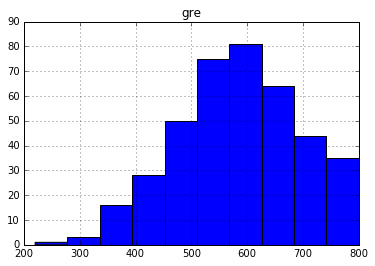

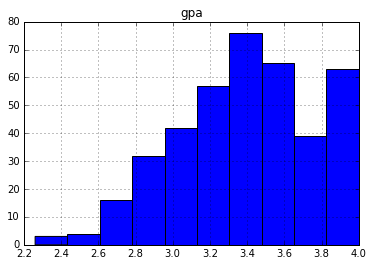

In [19]:
df_clean.hist('gre')
df_clean.hist('gpa')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: its a little skewed..

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: we could try to unskew it - maybe using a log function?


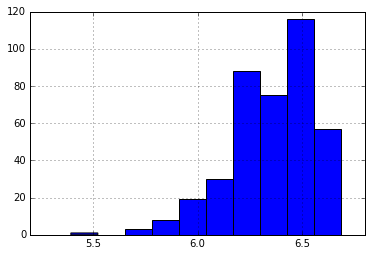

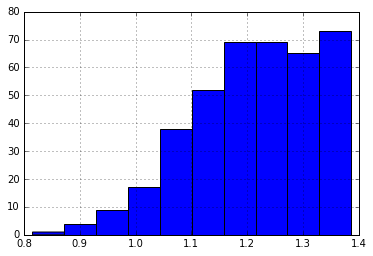

In [34]:
# unskewed_gre = pd.DataFrame(np.log(df_clean['gre'].tolist()))
# unskewed_gre.hist()
# unskewed_gpa = pd.DataFrame(np.log(df_clean['gpa'].tolist()))
# unskewed_gpa.hist()

df_log=pd.DataFrame(np.log(df_clean))
df_log['gre'].hist()
plt.show()
df_log['gpa'].hist()

# Hmm doesn't look too convincing

#### Question 11. Which of our variables are potentially colinear? 

In [37]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:  Non of the variables are highly correlated. GRE and GPA have the highest correlation of all the columns.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: As explored in Unit-1, we compared the relationship between each variable and admission rates. The most significant seems to be prestige which has 24% correlation with admition. 

#### Question 14. What is your hypothesis? 

Answer: a lower prestige number will result in a higher likelyhood of admission

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data